# Lab 03_1: Qubit-Resonator System (3D Cavity)

### modified by Seong Hyeon Park (pajoheji0909@snu.ac.kr)
### original code from pyEPR Tutorial_notebooks (ZK Minev: https://github.com/zlatko-minev/pyEPR)

### Please find the attached homework at the end of this tutorial code

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

import pyEPR as epr

## connect to the example HFSS project file

In [3]:
# NOTE: you have to correctly set the project path
project_path =  './' 
# project "file name"
project_name = 'pyEPR_tutorial1'
# project "design name"
design_name  = '1. single_transmon'

pinfo = epr.ProjectInfo(project_path = project_path,
                        project_name = project_name,
                        design_name = design_name)

INFO 02:46PM [connect_project]: Connecting to Ansys Desktop API...
INFO 02:46PM [load_ansys_project]: 	File path to HFSS project found.
INFO 02:46PM [load_ansys_project]: 	Opened Ansys App
INFO 02:46PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 02:46PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/GitHub/sqc_lecture_notes/tutorials/
	Project:   pyEPR_tutorial1
INFO 02:46PM [connect_design]: 	Opened active design
	Design:    1. single_transmon [Solution type: Eigenmode]
INFO 02:46PM [get_setup]: 	Opened setup `Setup1`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 02:46PM [connect]: 	Connected to project "pyEPR_tutorial1" and design "1. single_transmon" 😀 



In [4]:
# Qubit junction

Lj_value = '12 nH'
Cj_value = '2 fF'

pinfo.design.set_variable('Lj_1', Lj_value); pinfo.design.set_variable('Cj_1', Cj_value)

# NOTE: correctly set the L_j (and C_j), JJ rectangular and line objects
pinfo.junctions['junction'] = {'Lj_variable' : 'Lj_1',
                               'Cj_variable' : 'Cj_1',
                                'rect' : 'rect_jj1',
                                'line' : 'line_jj1'}
pinfo.validate_junction_info()                                

## update the eigenmode simulation setup

In [5]:
from qiskit_metal.analyses.quantization import EPRanalysis

setup_name = "Setup1"

# delete already existing setup and create a new one
try:
    pinfo.design.delete_setup(setup_name)
except:
    pass

pinfo.design.create_em_setup(name=setup_name,
                             min_freq_ghz=2,
                             n_modes=2,
                             max_delta_f=0.5,
                             max_passes=15,
                             min_passes=1,
                             min_converged=2,
                             basis_order=1)

# check the setup
pinfo.setup

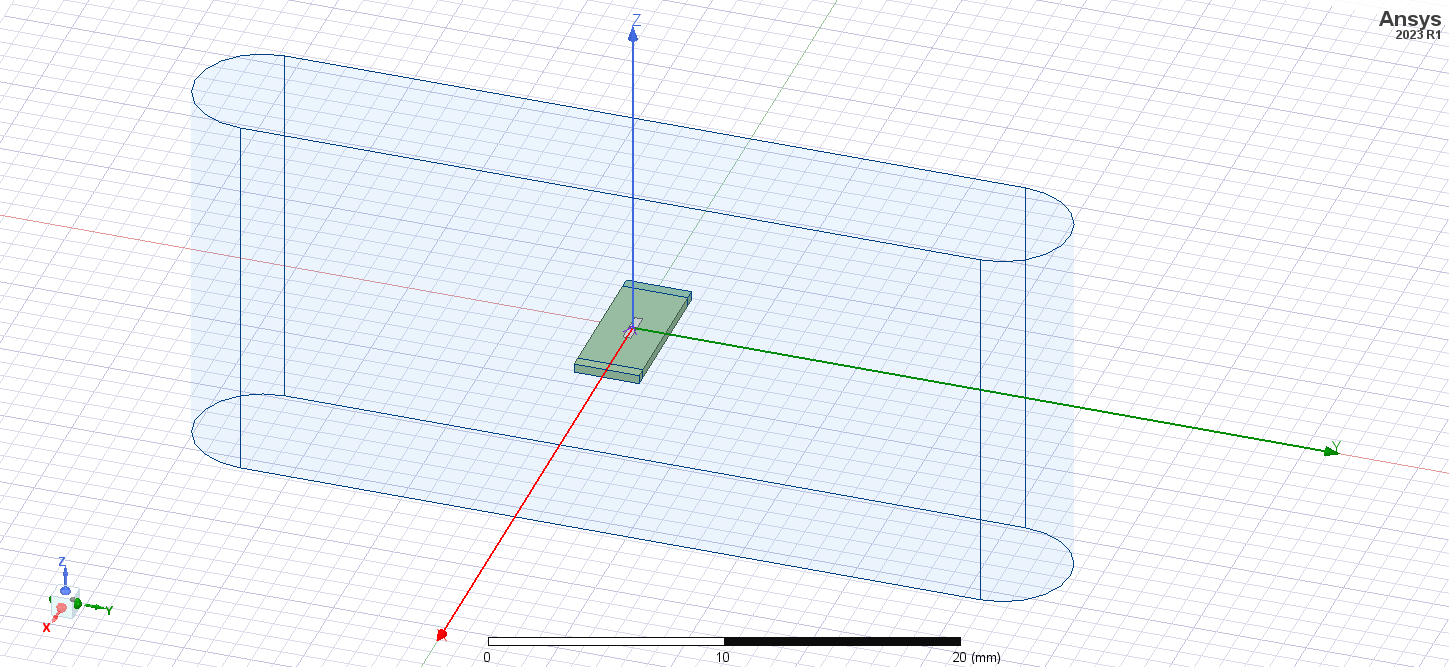

WindowsPath('c:/Users/USER/Documents/GitHub/sqc_lecture_notes/tutorials/ansys.png')

In [6]:
pinfo.design.save_screenshot()

## Do EPR analysis!

In [7]:
pinfo.setup.analyze()

epr_hfss = epr.DistributedAnalysis(pinfo)
    
epr_hfss.do_EPR_analysis()

INFO 02:46PM [analyze]: Analyzing setup Setup1


Design "1. single_transmon" info:
	# eigenmodes    2
	# variations    1

Variation 0  [1/1]

  Mode 0 at 4.62 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               97.9%  5.573e-23 1.145e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.02%
	junction        0.998158  (+)        0.0201837
		(U_tot_cap-U_tot_ind)/mean=0.07%

  Mode 1 at 9.25 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.3%  4.435e-21 4.422e-21

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 92.50%
	junction        0.003165  (+)        0.000256502
		(U_tot_cap-U_tot_ind)/mean=0.00%

ANALYSIS DONE. Data saved to:

C:\data-

(WindowsPath('C:/data-pyEPR/pyEPR_tutorial1/1. single_transmon/2025-01-20 14-47-59.npz'),
 ['0'])

## Do EPR analysis! (numerical diagonalization of the Hamiltonian)

#### NOTE: `cos_trunc`: truncated order for a cosine potential of a Josephson junction and `Fock_trunc`: truncated order for an oscillator   
#### NOTE: `PT`: Perturbation theory and `ND`: Numerical diagonalization

In [11]:
epra = epr.QuantumAnalysis(epr_hfss.data_filename)
epra.analyze_all_variations(cos_trunc = 10, fock_trunc = 15)

WARNING 02:48PM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.001471
1    1.000835
dtype: float64

Pm_norm idx =
   junction
0      True
1     False
*** P (participation matrix, not normlz.)
   junction
0  0.978410
1  0.003164

*** S (sign-bit matrix)
   s_junction
0          -1
1          -1
*** P (participation matrix, normalized.)
      0.98
    0.0032

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       188     2.43
      2.43  0.00786

*** Chi matrix ND (MHz) 
       210     2.44
      2.44  0.00709

*** Frequencies O1 PT (MHz)
0    4430.475260
1    9247.302703
dtype: float64

*** Frequencies ND (MHz)
0    4421.840456
1    9247.284783
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


OrderedDict([('0',
              OrderedDict([('f_0', 0    4619.720126
                            1    9248.526148
                            Name: 0, dtype: float64),
                           ('f_1',
                            0    4430.475260
                            1    9247.302703
                            dtype: float64),
                           ('f_ND',
                            0    4421.840456
                            1    9247.284783
                            dtype: float64),
                           ('chi_O1',
                                        0         1
                            0  188.029280  2.431172
                            1    2.431172  0.007859),
                           ('chi_ND',
                                        0         1
                            0  209.555084  2.435831
                            1    2.435831  0.007090),
                           ('ZPF',
                            array([[-0.40761983],
            

## parametric sweep simulation

Linear step or linear count are useful to define parametric sweep simulations in ANSYS HFSS

In [ ]:
opti_name = "linear_step"
swp_variable = 'height'
swp_params = ('30mm','36mm','1mm')

# 'height' is a geometric variable so cannot copy mesh between passes

sweep_settings = dict(
    variable = swp_variable,
    swp_type = 'linear_step',
    swp_params = swp_params,
    name = opti_name,
    setup_name = setup_name, 
    save_fields = True,
    copy_mesh = False, 
    solve_with_copied_mesh_only = False, 
    setup_type = 'parametric'
)

# setup_name=None will use the first setup
if opti_name not in pinfo.design.optimetrics.get_setup_names():
    opti_setup = pinfo.design.optimetrics.create_setup(**sweep_settings)
    
"""
opti_name = "linear_count"
swp_variable = 'pad_gap'
swp_params = ('80um', '120um', 5)

sweep_settings = dict(
    variable = swp_variable,
    swp_type = 'linear_count',
    swp_params = swp_params,
    name = opti_name,
    setup_name = setup_name, 
    save_fields = True,
    copy_mesh = False, 
    solve_with_copied_mesh_only = False, 
    setup_type = 'parametric'
)

if opti_name not in pinfo.design.optimetrics.get_setup_names():
    opti_setup = pinfo.design.optimetrics.create_setup(**sweep_settings)
"""

In [ ]:
analysis_setup = pinfo.design.get_setup(setup_name)
analysis_setup.solve(setup_name)

pinfo.design.optimetrics.solve_setup("param_file")

# LAB HOMEWORK

### Transmon-cavity system (floating type; double pad geometry) simulations. You should achieve the target parameters within 3\%. The overall circuit layout, electric field distribution, and the convergence plot vs. adaptive pass should be attached to the report.

1. Analyze the variations of qubit frequency $\omega_q$, qubit anharmonicity $\alpha$, cavity resonator frequency $\omega_c$, and qubit-resonator cross Kerr shift $\chi_{qr}$ by increasing (or decreasing) `pad_gap`, `pad_w` and `pad_h` of a double pad geometry and `Lj_1` of a Josephson junction.
2. Analyze the variations of qubit frequency $\omega_q$, qubit anharmonicity $\alpha$, cavity resonator frequency $\omega_c$, and qubit-resonator cross Kerr shift $\chi_{qr}$ by increasing (or decreasing) the geometric features of a cavity.